# This nootebook contain 2 part 
* **First Part Wrangle data**
* **Second Part Perform EDA (Exploratory Data Analysis) by answer the questions**

**Q1- What teams improved the most over the time period?**

**Q2- Which players had the most penalties?**

**Q3- Real Madrid CF from 2008-2015**

# import package

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import sqlite3
import seaborn as sns; sns.set()
%matplotlib inline 

In [2]:
con = sqlite3.connect('E:/Advanced Data Analysis/Lesson 2/Project/database.sqlite')
# E:\Advanced Data Analysis\Lesson 2\Project
df_soccer = pd.read_sql_query("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""",con)
df_soccer

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [3]:
Player_Attributes = pd.read_sql("""SELECT * FROM Player_Attributes """,con)
Player = pd.read_sql("""SELECT * FROM Player""",con)
Match = pd.read_sql("""SELECT * FROM Match""",con)
League = pd.read_sql("""SELECT * FROM League""",con)
Country = pd.read_sql("""SELECT * FROM Country """,con)
Team = pd.read_sql("""SELECT * FROM Team""",con)
Team_Attributes = pd.read_sql("""SELECT * FROM Team_Attributes""",con)


# Part 1- Check The Dataset And prepare it 

In [4]:
print('Country')
print(Country.shape)
print(Country.columns)
print('-'*100)

print('League')
print(League.shape)
print(League.columns)
print('-'*100)

print('Team')
print(Team.shape)
print(Team.columns)
print('-'*100)

print('Team_Attributes')
print(Team_Attributes.shape)
print(Team_Attributes.columns)
print('-'*100)

print('Player')
print(Player.shape)
print(Player.columns)
print('-'*100)

print('Player_Attributes')
print(Player_Attributes.shape)
print(Player_Attributes.columns)
print('-'*100)

print('Match')
print(Match.shape)
print(Match.columns)
print('-'*100)


Country
(11, 2)
Index(['id', 'name'], dtype='object')
----------------------------------------------------------------------------------------------------
League
(11, 3)
Index(['id', 'country_id', 'name'], dtype='object')
----------------------------------------------------------------------------------------------------
Team
(299, 5)
Index(['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name',
       'team_short_name'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Team_Attributes
(1458, 25)
Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanc

# 1- Wrangle data

**1- Country**

In [5]:
Country.info()
Country

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
id      11 non-null int64
name    11 non-null object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


**2-League**

In [6]:
League.info()
League

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
id            11 non-null int64
country_id    11 non-null int64
name          11 non-null object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


**3-Team**

In [7]:
Team.info()
Team

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


In [8]:
print(sum(Team['team_api_id'].duplicated()))
print(sum(Team['team_fifa_api_id'].duplicated()))


0
13


In [9]:
Team.drop_duplicates(subset=['team_fifa_api_id'],inplace=True)
print(sum(Team['team_fifa_api_id'].duplicated()))

0


In [10]:
Team.info()
Team

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 0 to 297
Data columns (total 5 columns):
id                  286 non-null int64
team_api_id         286 non-null int64
team_fifa_api_id    285 non-null float64
team_long_name      286 non-null object
team_short_name     286 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 13.4+ KB


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
293,49124,10243,894.0,FC Zürich,ZUR
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER


**We have a missed value in team_fifa_api_id**

In [11]:
Team = Team.dropna()
Team.info()
Team

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 297
Data columns (total 5 columns):
id                  285 non-null int64
team_api_id         285 non-null int64
team_fifa_api_id    285 non-null float64
team_long_name      285 non-null object
team_short_name     285 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 13.4+ KB


,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
293,49124,10243,894.0,FC Zürich,ZUR
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER


**4-Team_Attributes**

In [12]:
Team_Attributes.info()
Team_Attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


**A- Missing value**

In [13]:
mean1 = Team_Attributes['buildUpPlayDribbling'].mean()
Team_Attributes['buildUpPlayDribbling'].fillna(mean1,inplace=True)
Team_Attributes.info()
Team_Attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              1458 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShooti

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,48.607362,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.000000,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.000000,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,48.607362,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,48.607362,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,48.607362,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,48.607362,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,48.607362,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.000000,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


**B-change datatype**

In [14]:
Team_Attributes['date']=pd.to_datetime(Team_Attributes['date'])
Team_Attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null datetime64[ns]
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              1458 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreati

**5-Player**

In [15]:
Player.info()
Player

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


**A-Change datatype**

In [16]:
Player['birthday']=pd.to_datetime(Player['birthday'])
Player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null datetime64[ns]
height                11060 non-null float64
weight                11060 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 605.0+ KB


In [17]:
sum(Player['player_fifa_api_id'].duplicated())

0

In [18]:
Player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null datetime64[ns]
height                11060 non-null float64
weight                11060 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 605.0+ KB


**6-Player_Attributes**

In [19]:
Player_Attributes.info()
Player_Attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


**A-change data type**

In [20]:
Player_Attributes['date']=pd.to_datetime(Player_Attributes['date'])
Player_Attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null datetime64[ns]
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float6

**B-Missed Value**

In [21]:
m = list(range(0,183978))
len(m)
m

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [22]:
n = Player_Attributes.columns[0]
Player_Attributes.drop(n, axis=1, inplace=True)
Player_Attributes[n] = m
Player_Attributes

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id
0,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,0
1,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1
2,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2
3,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,3
4,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,102359,39902,2009-08-30,83.0,85.0,right,medium,low,84.0,77.0,...,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,183973
183974,102359,39902,2009-02-22,78.0,80.0,right,medium,low,74.0,76.0,...,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,183974
183975,102359,39902,2008-08-30,77.0,80.0,right,medium,low,74.0,71.0,...,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,183975
183976,102359,39902,2007-08-30,78.0,81.0,right,medium,low,74.0,64.0,...,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0,183976


**Change value in attacking_work_rate from string to float**

In [23]:
Player_Attributes['attacking_work_rate'].value_counts()

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64

In [24]:
Player_Attributes['attacking_work_rate'].replace('medium',0.5,inplace=True)
Player_Attributes['attacking_work_rate'].replace('high',1.0,inplace=True)
Player_Attributes['attacking_work_rate'].replace('low',0.0,inplace=True)
Player_Attributes['attacking_work_rate'].replace('None',0.0,inplace=True)
Player_Attributes['attacking_work_rate'].replace('norm',0.5,inplace=True)
Player_Attributes['attacking_work_rate'].replace('y',0.0,inplace=True)
Player_Attributes['attacking_work_rate'].replace('le',0.0,inplace=True)
Player_Attributes['attacking_work_rate'].replace('stoc',0.0,inplace=True)



In [25]:
Player_Attributes['attacking_work_rate'].value_counts()

0.5    125418
1.0     42823
0.0     12507
Name: attacking_work_rate, dtype: int64

**Change value in defensive_work_rate from string to float**

In [26]:
Player_Attributes['defensive_work_rate'].value_counts()

medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
0            197
6            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64

In [27]:
Player_Attributes['defensive_work_rate'].replace('medium',0.5,inplace=True)
Player_Attributes['defensive_work_rate'].replace('high',1.0,inplace=True)
Player_Attributes['defensive_work_rate'].replace('low',0.0,inplace=True)
Player_Attributes['defensive_work_rate'].replace('_0',0.0,inplace=True)
Player_Attributes['defensive_work_rate'].replace('_0',0.0,inplace=True)
Player_Attributes['defensive_work_rate'].replace('ormal',0.5,inplace=True)
Player_Attributes['defensive_work_rate'].replace('o',0.0,inplace=True)
Player_Attributes['defensive_work_rate'].replace('es',0.0,inplace=True)
Player_Attributes['defensive_work_rate'].replace('ean',0.0,inplace=True)
Player_Attributes['defensive_work_rate'].replace('tocky',0.0,inplace=True)
Player_Attributes['defensive_work_rate'].replace('0',0.0,inplace=True)
Player_Attributes['defensive_work_rate'].replace('1',0.0,inplace=True)
Player_Attributes['defensive_work_rate'].replace('2',0.0,inplace=True)
Player_Attributes['defensive_work_rate'].replace('3',0.0,inplace=True)
Player_Attributes['defensive_work_rate'].replace('4',0.5,inplace=True)
Player_Attributes['defensive_work_rate'].replace('5',0.5,inplace=True)
Player_Attributes['defensive_work_rate'].replace('6',0.5,inplace=True)
Player_Attributes['defensive_work_rate'].replace('7',1.0,inplace=True)
Player_Attributes['defensive_work_rate'].replace('8',1.0,inplace=True)
Player_Attributes['defensive_work_rate'].replace('9',1.0,inplace=True)



In [28]:
Player_Attributes['defensive_work_rate'].value_counts()

0.5    131741
1.0     27488
0.0     23913
Name: defensive_work_rate, dtype: int64

**change data type**

In [29]:
Player_Attributes['attacking_work_rate'] = Player_Attributes['attacking_work_rate'].astype(float)
Player_Attributes['defensive_work_rate'] = Player_Attributes['defensive_work_rate'].astype(float)
Player_Attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null datetime64[ns]
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null float64
defensive_work_rate    183142 non-null float64
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
acceleration           183142 non-null fl

 **Missed Non value**

In [30]:
# volleys
mean_volleys = Player_Attributes['volleys'].mean()
Player_Attributes['volleys'].fillna(mean_volleys,inplace=True)

# curve
mean_curve = Player_Attributes['curve'].mean()
Player_Attributes['curve'].fillna(mean_curve,inplace=True)

# agility
mean_agility = Player_Attributes['agility'].mean()
Player_Attributes['agility'].fillna(mean_agility,inplace=True)

# balance
mean_balance = Player_Attributes['balance'].mean()
Player_Attributes['balance'].fillna(mean_balance,inplace=True)

# jumping
mean_jumping = Player_Attributes['jumping'].mean()
Player_Attributes['jumping'].fillna(mean_jumping ,inplace=True)

# vision
mean_vision = Player_Attributes['vision'].mean()
Player_Attributes['vision'].fillna(mean_vision, inplace=True)

# sliding_tackle
mean_sliding_tackle = Player_Attributes['sliding_tackle'].mean()
Player_Attributes['sliding_tackle'].fillna(mean_sliding_tackle, inplace=True)

Player_Attributes.info()
Player_Attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null datetime64[ns]
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null float64
defensive_work_rate    183142 non-null float64
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                183978 non-null float64
dribbling              183142 non-null float64
curve                  183978 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
acceleration           183142 non-null fl

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id
0,218353,505942,2016-02-18,67.0,71.0,right,0.5,0.5,49.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,0
1,218353,505942,2015-11-19,67.0,71.0,right,0.5,0.5,49.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1
2,218353,505942,2015-09-21,62.0,66.0,right,0.5,0.5,49.0,44.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2
3,218353,505942,2015-03-20,61.0,65.0,right,0.5,0.5,48.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,3
4,218353,505942,2007-02-22,61.0,65.0,right,0.5,0.5,48.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,102359,39902,2009-08-30,83.0,85.0,right,0.5,0.0,84.0,77.0,...,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,183973
183974,102359,39902,2009-02-22,78.0,80.0,right,0.5,0.0,74.0,76.0,...,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,183974
183975,102359,39902,2008-08-30,77.0,80.0,right,0.5,0.0,74.0,71.0,...,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,183975
183976,102359,39902,2007-08-30,78.0,81.0,right,0.5,0.0,74.0,64.0,...,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0,183976


**A2-change data type**

In [31]:
Player_Attributes['attacking_work_rate']=Player_Attributes['attacking_work_rate'].astype(float)
Player_Attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null datetime64[ns]
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null float64
defensive_work_rate    183142 non-null float64
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                183978 non-null float64
dribbling              183142 non-null float64
curve                  183978 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
acceleration           183142 non-null fl

**7-Match**

In [32]:
Match.info()
Match

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
for col in Match.columns:
    print(col)

id
country_id
league_id
season
stage
date
match_api_id
home_team_api_id
away_team_api_id
home_team_goal
away_team_goal
home_player_X1
home_player_X2
home_player_X3
home_player_X4
home_player_X5
home_player_X6
home_player_X7
home_player_X8
home_player_X9
home_player_X10
home_player_X11
away_player_X1
away_player_X2
away_player_X3
away_player_X4
away_player_X5
away_player_X6
away_player_X7
away_player_X8
away_player_X9
away_player_X10
away_player_X11
home_player_Y1
home_player_Y2
home_player_Y3
home_player_Y4
home_player_Y5
home_player_Y6
home_player_Y7
home_player_Y8
home_player_Y9
home_player_Y10
home_player_Y11
away_player_Y1
away_player_Y2
away_player_Y3
away_player_Y4
away_player_Y5
away_player_Y6
away_player_Y7
away_player_Y8
away_player_Y9
away_player_Y10
away_player_Y11
home_player_1
home_player_2
home_player_3
home_player_4
home_player_5
home_player_6
home_player_7
home_player_8
home_player_9
home_player_10
home_player_11
away_player_1
away_player_2
away_player_3
away_player_4
a

In [34]:
# Match_edit = Match[['id',
# 'country_id',
# 'league_id',
# 'season',
# 'home_team_api_id',
# 'away_team_api_id',
# 'home_team_goal',
# 'away_team_goal',
# 'home_player_1',
# 'home_player_2',
# 'home_player_3',
# 'home_player_4',
# 'home_player_5',
# 'home_player_6',
# 'home_player_7',
# 'home_player_8',
# 'home_player_9',
# 'home_player_10',
# 'home_player_11',
# 'away_player_1',
# 'away_player_2',
# 'away_player_3',
# 'away_player_4',
# 'away_player_5',
# 'away_player_6',
# 'away_player_7',
# 'away_player_8',
# 'away_player_9',
# 'away_player_10',
# 'away_player_11',
# 'goal']]
# Match_edit.info()
# Match_edit

In [35]:
Match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Part 2- Answer to the questions

# Q1- What teams improved the most over the time period?

**We can answer to this question by using Team_attribute** 

**First Sort the dataframe by $Date$**

In [36]:
Team_Attributes.info()
Team_Attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null datetime64[ns]
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              1458 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreati

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22,60,Balanced,48.607362,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19,52,Balanced,48.000000,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10,47,Balanced,41.000000,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22,70,Fast,48.607362,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22,47,Balanced,48.607362,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22,52,Balanced,48.607362,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22,54,Balanced,48.607362,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20,54,Balanced,48.607362,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19,54,Balanced,42.000000,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


# We need to know the most team over the time period

* **First I Create a new dataframe that contain each team with summation columns by using groupby**
* **Second I calculate the summation for each team**
* **Third I sort the data frame by descending**
* **fourth find the name of team by using team_api_id**

In [37]:
# groupby for each team 
Team_total=Team_Attributes.groupby(by='team_api_id')[['buildUpPlaySpeed','buildUpPlayPassing','buildUpPlayDribbling',
                                             'chanceCreationPassing',
                                             'chanceCreationCrossing','chanceCreationShooting','defencePressure',
                                             'defenceAggression','defenceTeamWidth']].sum()
Team_total

,buildUpPlaySpeed,buildUpPlayPassing,buildUpPlayDribbling,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
team_api_id,,,,,,,,,
1601,284,277,290.429448,333,362,321,283,284,296
1773,156,150,148.214724,150,159,162,129,132,150
1957,283,316,302.429448,305,218,402,296,338,322
2033,245,242,256.429448,259,221,241,211,169,227
2182,362,294,299.429448,340,344,408,310,291,327
...,...,...,...,...,...,...,...,...,...
10281,317,322,278.429448,302,355,302,273,307,316
108893,259,319,288.429448,276,230,237,230,276,278
158085,134,78,132.000000,110,118,92,72,76,74


In [38]:
# calculate the summation 
Team_total = Team_total.sum(axis=1)
Team_total

team_api_id
1601      2730.429448
1773      1336.214724
1957      2782.429448
2033      2071.429448
2182      2975.429448
             ...     
10281     2772.429448
108893    2393.429448
158085     886.000000
208931     852.000000
274581     440.000000
Length: 288, dtype: float64

In [39]:
# sort value 
Team_total.sort_values(inplace=True)
Team_total

team_api_id
8614     353.607362
6421     363.607362
9824     411.000000
6547     414.000000
8019     428.000000
           ...     
8600    3017.429448
8697    3027.429448
9985    3046.429448
9789    3080.429448
9925    3090.429448
Length: 288, dtype: float64

In [40]:
# find the name of team by using team_api_id
The_Best_Team = Team.loc[Team['team_api_id']==9925]
print(The_Best_Team)

        id  team_api_id  team_fifa_api_id team_long_name team_short_name
242  39395         9925              78.0         Celtic             CEL


**draw the best 5 and least 5**

In [41]:
The_Best_5_Team = Team_Attributes[Team_Attributes['team_api_id'].isin([9925,9985,8191,8658,9789])]
The_Best_5_Team

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
166,167,88,8658,2010-02-22,70,Fast,48.607362,Little,70,Long,...,70,Lots,Organised,70,High,70,Double,70,Wide,Cover
167,168,88,8658,2011-02-22,45,Balanced,48.607362,Little,60,Mixed,...,40,Normal,Organised,30,Deep,60,Press,45,Normal,Cover
168,169,88,8658,2012-02-22,51,Balanced,48.607362,Little,55,Mixed,...,56,Normal,Organised,42,Medium,48,Press,54,Normal,Cover
169,170,88,8658,2013-09-20,56,Balanced,48.607362,Little,57,Mixed,...,41,Normal,Organised,42,Medium,44,Press,54,Normal,Cover
170,171,88,8658,2014-09-19,56,Balanced,39.000000,Normal,79,Long,...,56,Normal,Organised,42,Medium,48,Press,54,Normal,Cover
171,172,88,8658,2015-09-10,56,Balanced,32.000000,Little,75,Long,...,64,Normal,Organised,42,Medium,47,Press,54,Normal,Cover
209,210,22,9789,2010-02-22,70,Fast,48.607362,Little,45,Mixed,...,66,Normal,Free Form,54,Medium,70,Double,53,Normal,Offside Trap
210,211,22,9789,2011-02-22,73,Fast,48.607362,Little,43,Mixed,...,64,Normal,Organised,59,Medium,67,Double,46,Normal,Cover
211,212,22,9789,2012-02-22,71,Fast,48.607362,Little,45,Mixed,...,70,Lots,Free Form,58,Medium,69,Double,46,Normal,Cover
212,213,22,9789,2013-09-20,74,Fast,48.607362,Little,45,Mixed,...,76,Lots,Organised,60,Medium,70,Double,48,Normal,Cover


In [42]:
xx=The_Best_5_Team.groupby('team_api_id').sum()
xx

,id,team_fifa_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
team_api_id,,,,,,,,,,,
8191,1509,10776,310,258.429448,357,375,371,326,306,345,368
8658,1017,528,334,265.429448,396,345,386,327,268,317,331
9789,1275,132,435,264.429448,279,390,267,398,356,415,276
9925,1749,468,368,295.429448,344,334,365,365,320,326,373
9985,7437,1392,358,284.429448,362,328,353,368,309,345,339


([array([9., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([9., 1., 0., 0., 0., 0., 1., 0., 0., 0.])],
 array([  132. ,  1196.4,  2260.8,  3325.2,  4389.6,  5454. ,  6518.4,
         7582.8,  8647.2,  9711.6, 10776. ]),
 <a list of 5 Lists of Patches objects>)

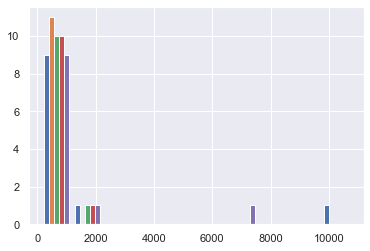

In [43]:
plt.hist(xx)

In [44]:
xx = xx.sum(axis=1)
xx

team_api_id
8191    15301.429448
8658     4514.429448
9789     4487.429448
9925     5307.429448
9985    11875.429448
dtype: float64

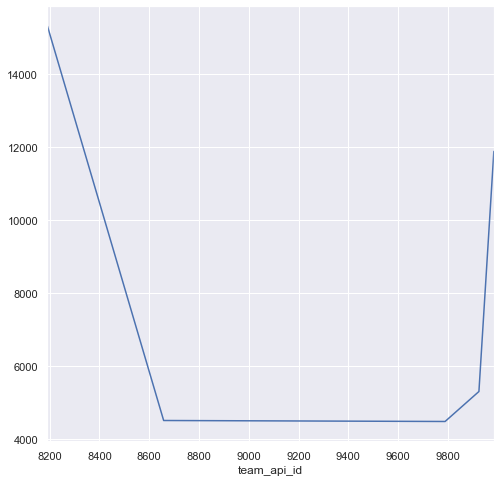

In [45]:
xx.plot(figsize=(8,8))

In [46]:
The_least_5_team = Team_Attributes[Team_Attributes['team_api_id'].isin([8614,6421,6547,9824,8613])]
The_least_5_team

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
184,185,1898,8613,2015-09-10,47,Balanced,56.000000,Normal,50,Mixed,...,53,Normal,Organised,32,Deep,62,Press,54,Normal,Cover
444,445,286,9824,2015-09-10,53,Balanced,32.000000,Little,56,Mixed,...,46,Normal,Organised,42,Medium,33,Contain,58,Normal,Cover
718,719,10018,6421,2010-02-22,30,Slow,48.607362,Little,30,Short,...,65,Normal,Organised,30,Deep,30,Contain,30,Narrow,Cover
978,979,100741,6547,2015-09-10,54,Balanced,54.000000,Normal,39,Mixed,...,38,Normal,Organised,40,Medium,35,Press,46,Normal,Cover
1186,1187,100646,8614,2010-02-22,35,Balanced,48.607362,Little,40,Mixed,...,65,Normal,Organised,30,Deep,30,Contain,30,Narrow,Cover


In [47]:
zz = The_least_5_team.groupby('team_api_id').sum()
zz

,id,team_fifa_api_id,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
team_api_id,,,,,,,,,,,
6421,719,10018,30,48.607362,30,50,50,65,30,30,30
6547,979,100741,54,54.000000,39,52,56,38,40,35,46
8613,185,1898,47,56.000000,50,37,38,53,32,62,54
8614,1187,100646,35,48.607362,40,30,45,65,30,30,30
9824,445,286,53,32.000000,56,38,53,46,42,33,58


([array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])],
 array([3.00000e+01, 1.01011e+04, 2.01722e+04, 3.02433e+04, 4.03144e+04,
        5.03855e+04, 6.04566e+04, 7.05277e+04, 8.05988e+04, 9.06699e+04,
        1.00741e+05]),
 <a list of 5 Lists of Patches objects>)

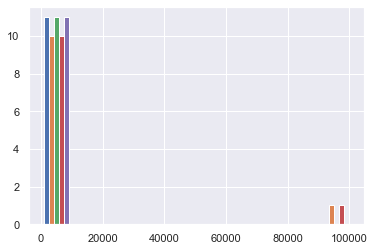

In [48]:
plt.hist(zz)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C7D2134C8>,
      dtype=object)

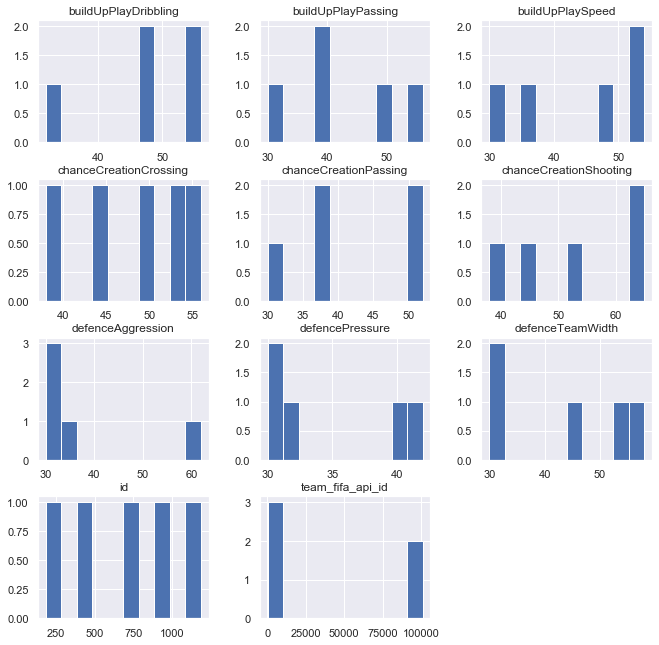

In [49]:
zz.hist(figsize=(11,11))

In [50]:
zz = zz.sum(axis=1)
zz

team_api_id
6421     11100.607362
6547    102134.000000
8613      2512.000000
8614    102186.607362
9824      1142.000000
dtype: float64

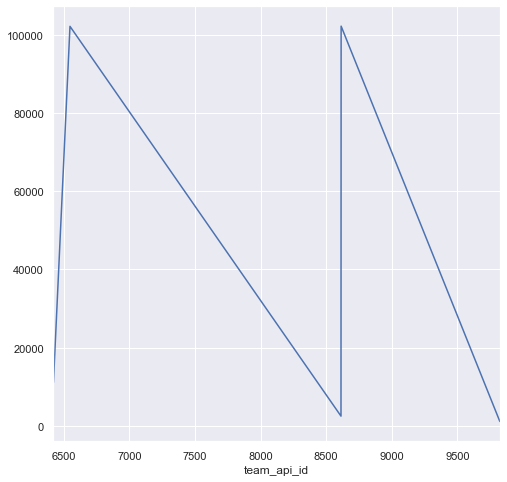

In [51]:
zz.plot(figsize=(8,8))

# Q2- Which players had the most penalties? 


*  **First I Create a new dataframe that contain each playyer with summation penalties column by using groupby**
*  **Second I calculate the summation for each player**
*  **Third I sort the data frame by descending**
*  **fourth find the name of team by using player_api_id**


In [52]:
Player_Attributes.info()
Player_Attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null datetime64[ns]
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null float64
defensive_work_rate    183142 non-null float64
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                183978 non-null float64
dribbling              183142 non-null float64
curve                  183978 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
acceleration           183142 non-null fl

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id
0,218353,505942,2016-02-18,67.0,71.0,right,0.5,0.5,49.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,0
1,218353,505942,2015-11-19,67.0,71.0,right,0.5,0.5,49.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1
2,218353,505942,2015-09-21,62.0,66.0,right,0.5,0.5,49.0,44.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2
3,218353,505942,2015-03-20,61.0,65.0,right,0.5,0.5,48.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,3
4,218353,505942,2007-02-22,61.0,65.0,right,0.5,0.5,48.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,102359,39902,2009-08-30,83.0,85.0,right,0.5,0.0,84.0,77.0,...,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,183973
183974,102359,39902,2009-02-22,78.0,80.0,right,0.5,0.0,74.0,76.0,...,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,183974
183975,102359,39902,2008-08-30,77.0,80.0,right,0.5,0.0,74.0,71.0,...,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,183975
183976,102359,39902,2007-08-30,78.0,81.0,right,0.5,0.0,74.0,64.0,...,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0,183976


In [53]:
Player_Pen=Player_Attributes.groupby(by='player_api_id').penalties.sum()
Player_Pen

player_api_id
2625      867.0
2752      744.0
2768      670.0
2770      959.0
2790      277.0
          ...  
744907    577.0
746419     86.0
748432     90.0
750435    549.0
750584    104.0
Name: penalties, Length: 11060, dtype: float64

In [54]:
Player_Pen.sort_values(inplace=True)
Player_Pen

player_api_id
192855      20.0
38962       28.0
258206      36.0
163985      39.0
163893      45.0
           ...  
25772     3799.0
26472     3813.0
41890     3984.0
108808    4120.0
41269     4314.0
Name: penalties, Length: 11060, dtype: float64

In [55]:
Player_PEN = Player.loc[Player['player_api_id']==41269]
Player_PEN

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
395,396,41269,Alessio Cerci,178393,1987-07-23,180.34,172


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C7FBF2F88>,
      dtype=object)

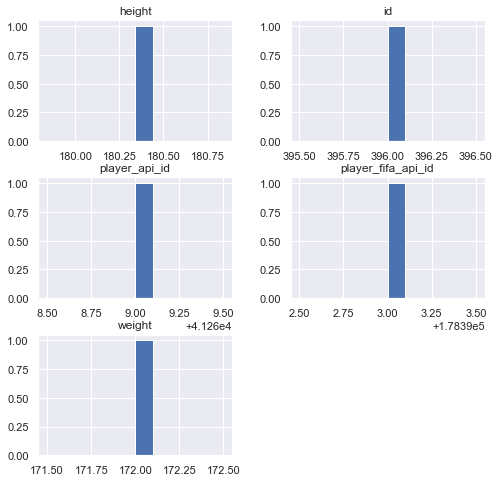

In [56]:
Player_PEN.hist(figsize=(8,8))

# Q3- Real Madrid CF from 2008-2015

In [57]:
Matchs_results = pd.read_sql("""SELECT Match.id
                            ,Country.name  country_name
                            ,League.name  League_name
                            ,date
                            ,season
                            ,Home_team.team_long_name  Home_team
                            ,away_team.team_long_name  away_team
                            ,home_team_goal
                            ,away_team_goal

 
                        FROM Country 
                        
                        join Match
                        on Country.id = Match.Country_id
                        
                        join League
                        on Country.id = League.Country_id
                        
                        LEFT JOIN Team AS Home_team 
                        on Home_team.team_api_id = Match.home_team_api_id
                        
                        LEFT JOIN Team AS away_team 
                        on away_team.team_api_id = Match.away_team_api_id
                        
                        """, con)

Matchs_results

,id,country_name,League_name,date,season,Home_team,away_team,home_team_goal,away_team_goal
0,1,Belgium,Belgium Jupiler League,2008-08-17 00:00:00,2008/2009,KRC Genk,Beerschot AC,1,1
1,2,Belgium,Belgium Jupiler League,2008-08-16 00:00:00,2008/2009,SV Zulte-Waregem,Sporting Lokeren,0,0
2,3,Belgium,Belgium Jupiler League,2008-08-16 00:00:00,2008/2009,KSV Cercle Brugge,RSC Anderlecht,0,3
3,4,Belgium,Belgium Jupiler League,2008-08-17 00:00:00,2008/2009,KAA Gent,RAEC Mons,5,0
4,5,Belgium,Belgium Jupiler League,2008-08-16 00:00:00,2008/2009,FCV Dender EH,Standard de Liège,1,3
...,...,...,...,...,...,...,...,...,...
25974,25975,Switzerland,Switzerland Super League,2015-09-22 00:00:00,2015/2016,FC St. Gallen,FC Thun,1,0
25975,25976,Switzerland,Switzerland Super League,2015-09-23 00:00:00,2015/2016,FC Vaduz,FC Luzern,1,2
25976,25977,Switzerland,Switzerland Super League,2015-09-23 00:00:00,2015/2016,Grasshopper Club Zürich,FC Sion,2,0
25977,25978,Switzerland,Switzerland Super League,2015-09-22 00:00:00,2015/2016,Lugano,FC Zürich,0,0


In [58]:
home_RM = Matchs_results[Matchs_results["Home_team"] == "Real Madrid CF"]
away_RM = Matchs_results[Matchs_results["away_team"] == "Real Madrid CF"]
home_RM['match_result'] = np.where(home_RM['home_team_goal'] > home_RM['away_team_goal'], 'win', 'lose')
home_RM['match_result'] = np.where(home_RM['home_team_goal'] == home_RM['away_team_goal'], 'draw', home_RM['match_result'])

away_RM['match_result'] = np.where(away_RM['home_team_goal'] < away_RM['away_team_goal'], 'win', 'lose')
away_RM['match_result'] = np.where(away_RM['home_team_goal'] == away_RM['away_team_goal'], 'draw', away_RM['match_result'])


RM = pd.concat([home_RM, away_RM])
RM

C:\Users\Vip B\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vip B\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Vip B\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,id,country_name,League_name,date,season,Home_team,away_team,home_team_goal,away_team_goal,match_result
21533,21534,Spain,Spain LIGA BBVA,2008-11-08 00:00:00,2008/2009,Real Madrid CF,Málaga CF,4,3,win
21554,21555,Spain,Spain LIGA BBVA,2008-11-22 00:00:00,2008/2009,Real Madrid CF,RC Recreativo,1,0,win
21575,21576,Spain,Spain LIGA BBVA,2008-12-07 00:00:00,2008/2009,Real Madrid CF,Sevilla FC,3,4,lose
21593,21594,Spain,Spain LIGA BBVA,2008-12-20 00:00:00,2008/2009,Real Madrid CF,Valencia CF,1,0,win
21603,21604,Spain,Spain LIGA BBVA,2009-01-04 00:00:00,2008/2009,Real Madrid CF,Villarreal CF,1,0,win
...,...,...,...,...,...,...,...,...,...,...
24467,24468,Spain,Spain LIGA BBVA,2016-04-30 00:00:00,2015/2016,Real Sociedad,Real Madrid CF,0,1,win
24488,24489,Spain,Spain LIGA BBVA,2016-05-14 00:00:00,2015/2016,RC Deportivo de La Coruña,Real Madrid CF,0,2,win
24512,24513,Spain,Spain LIGA BBVA,2015-09-23 00:00:00,2015/2016,Athletic Club de Bilbao,Real Madrid CF,1,2,win
24531,24532,Spain,Spain LIGA BBVA,2015-10-04 00:00:00,2015/2016,Atlético Madrid,Real Madrid CF,1,1,draw


Text(0.5, 1.0, "Real Madrid match's results from 2008 to 2015")

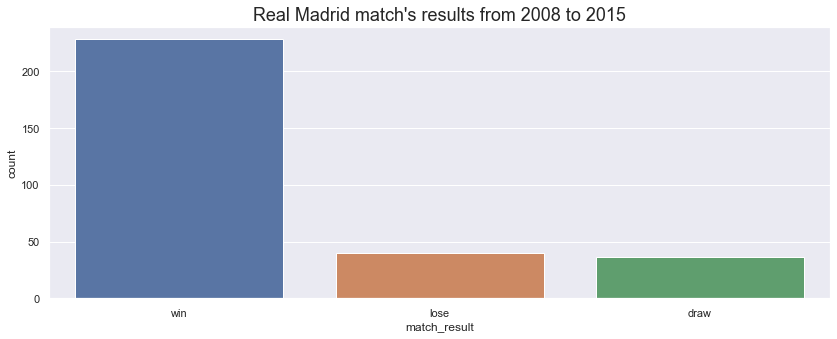

In [59]:
plt.figure(figsize=(14, 5))

sns.countplot("match_result",data=RM ).set_title("Real Madrid match's results from 2008 to 2015", fontsize=18)

In [60]:
goals_scored = home_RM['home_team_goal'].sum() + away_RM['away_team_goal'].sum()
goals_conceded = home_RM["away_team_goal"].sum() + home_RM['home_team_goal'].sum()
print("Real Madrid goals scored from 2008 to 2015 :  " ,   goals_scored)
print("Real Madrid goals conceded from 2008 to 2015 :" , goals_conceded)

Real Madrid goals scored from 2008 to 2015 :   843
Real Madrid goals conceded from 2008 to 2015 : 652


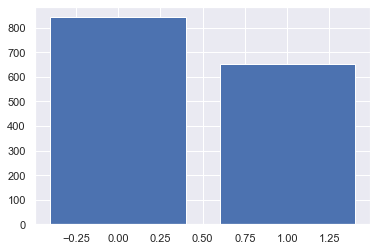

In [61]:
plt.bar([0,1],[goals_scored , goals_conceded])
plt.show()
